In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('forest_updated')

In [4]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


Dropping unamed column

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

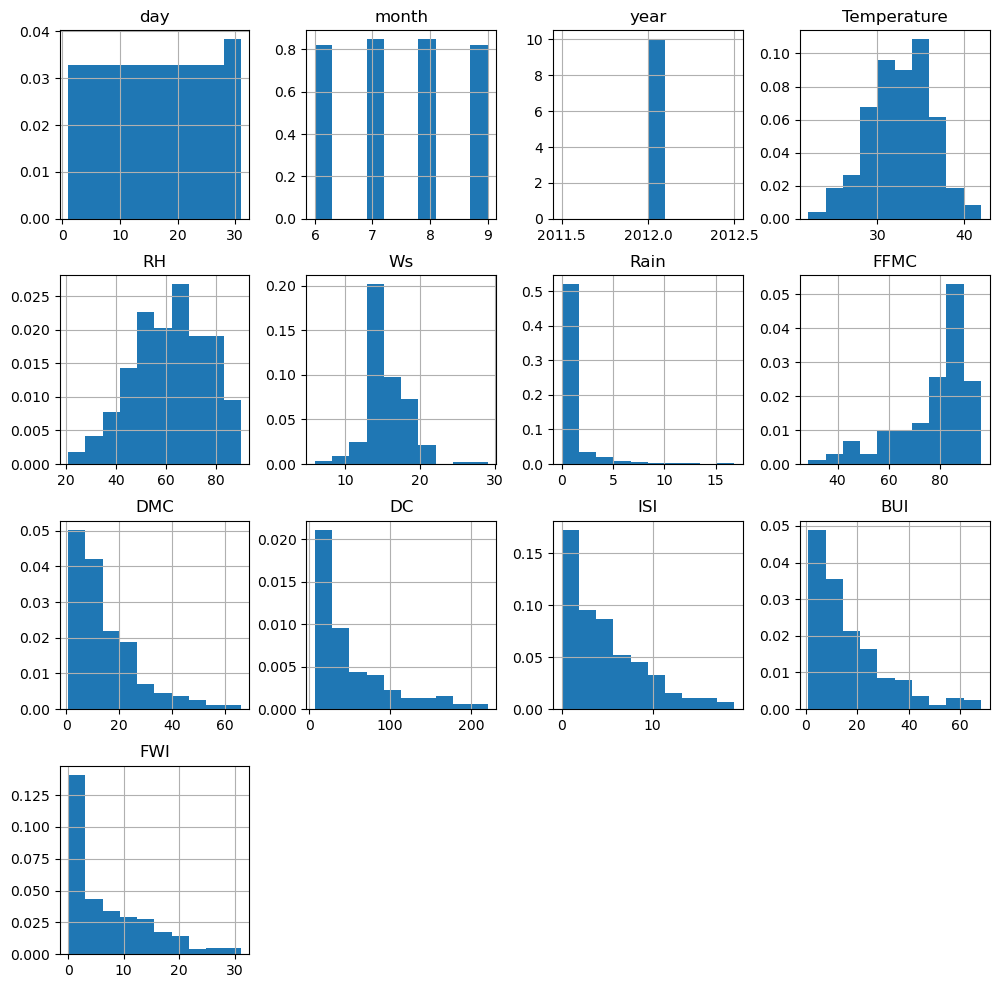

In [7]:
df.hist(density=True,figsize=(12,12))

1. observation: Temperature follows near gaussian distribution.whereas other attributes show positive and negative skews
2. observation: we can see there is no useful information we are getting from the year we can drop the column

In [8]:
df.reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

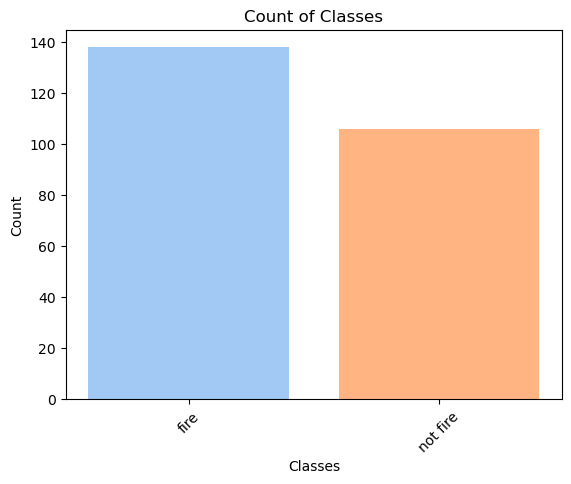

In [11]:
classes = df.groupby(['Classes'])['Classes'].count()

# Define a color palette
colors = sns.color_palette('pastel', len(classes))

# Plot the counts using matplotlib bar plot with custom colors
plt.bar(classes.index, classes, color=colors)

# Optionally, add labels and title
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Count of Classes')

# Rotate x-ticks if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()

observation:It is a balanced dataset

In [22]:
df1=df.copy()

In [23]:
##drooping the year column as it not needed

In [24]:
df1.drop(columns=['year'],inplace=True)

In [25]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [21]:
correlation_matrix

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350969
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083844
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.560079
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.572018
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029657
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323198
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.687291
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875325
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740079


C:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


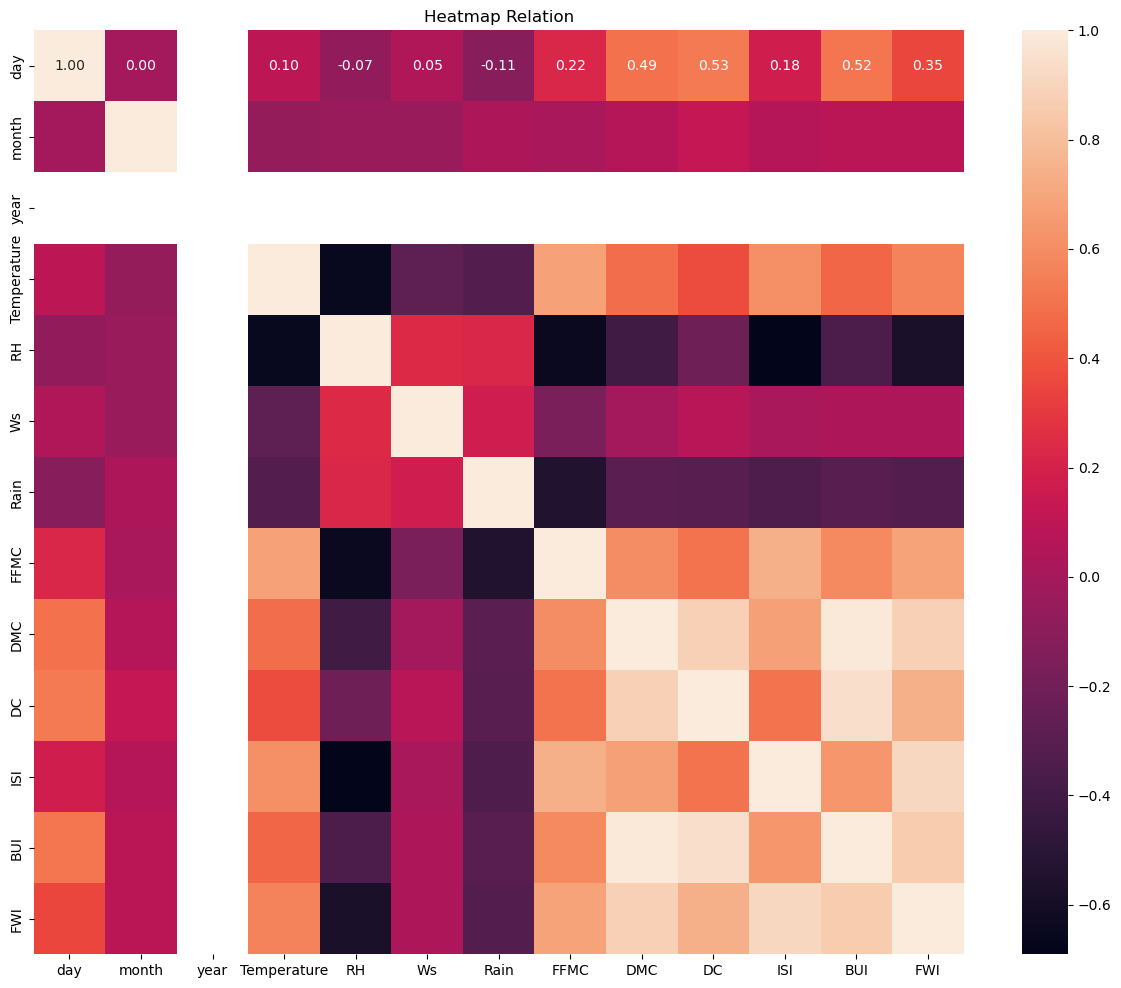

In [18]:
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(df1.drop(columns=['Classes']).corr(), annot=True, fmt='.2f');

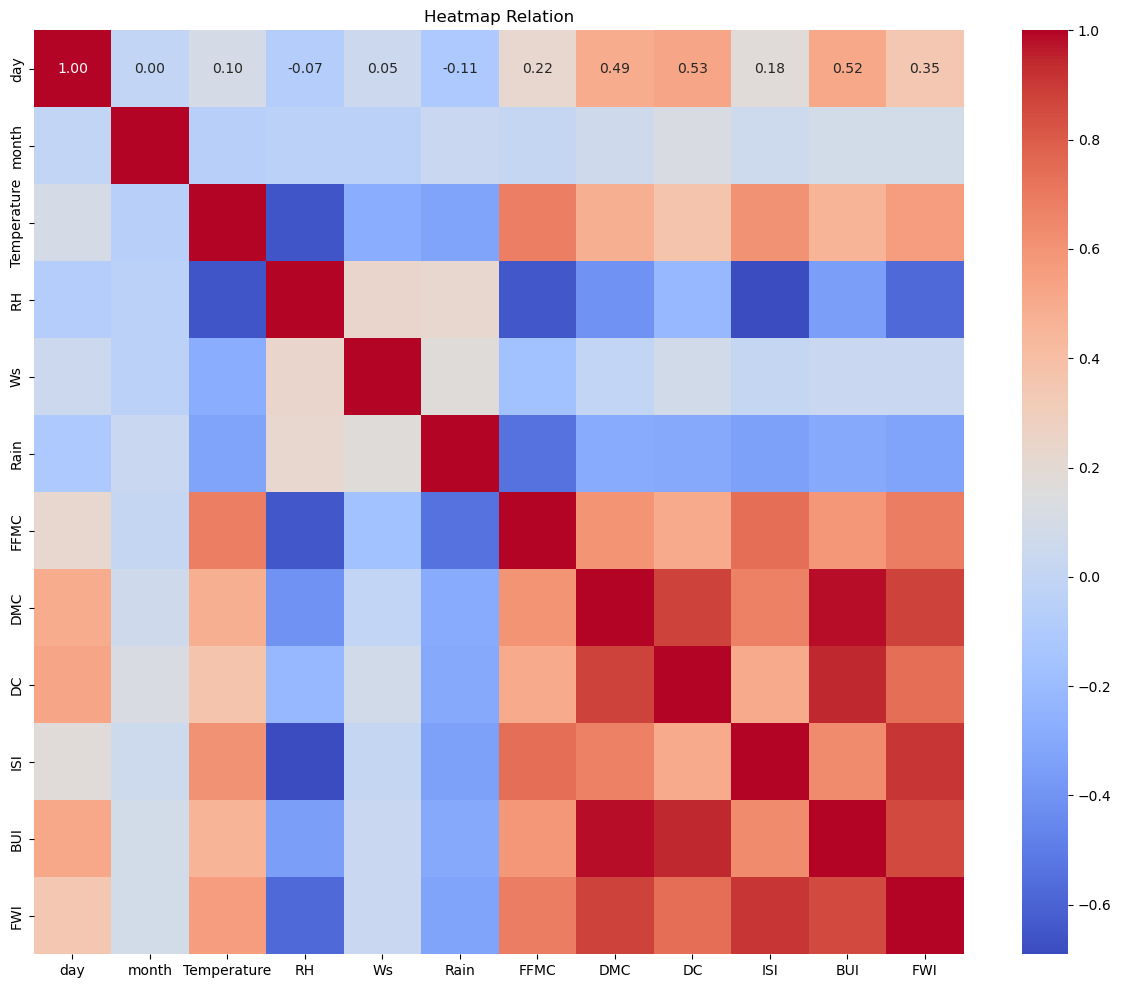

In [26]:
plt.figure(figsize=(15, 12))
plt.title("Heatmap Relation")

# Dropping the 'Classes' column and calculating the correlation matrix
correlation_matrix = df1.drop(columns=['Classes']).corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

# Show the plot
plt.show()

In [27]:
correlation_matrix

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350969
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083844
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.560079
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.572018
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029657
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323198
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.687291
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875325
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740079
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.909910


observation: Lighter colour shows higher correlation whereas darker colour shows no correlation here the columns DMC,DC,ISI 
are highly correlated we can drop any one of the column to improve accuracy

In [30]:
df1.drop(columns=['Classes']).corr()['Temperature']

day            0.095772
month         -0.059017
Temperature    1.000000
RH            -0.654443
Ws            -0.278132
Rain          -0.326786
FFMC           0.677491
DMC            0.483105
DC             0.370511
ISI            0.607551
BUI            0.455504
FWI            0.560079
Name: Temperature, dtype: float64

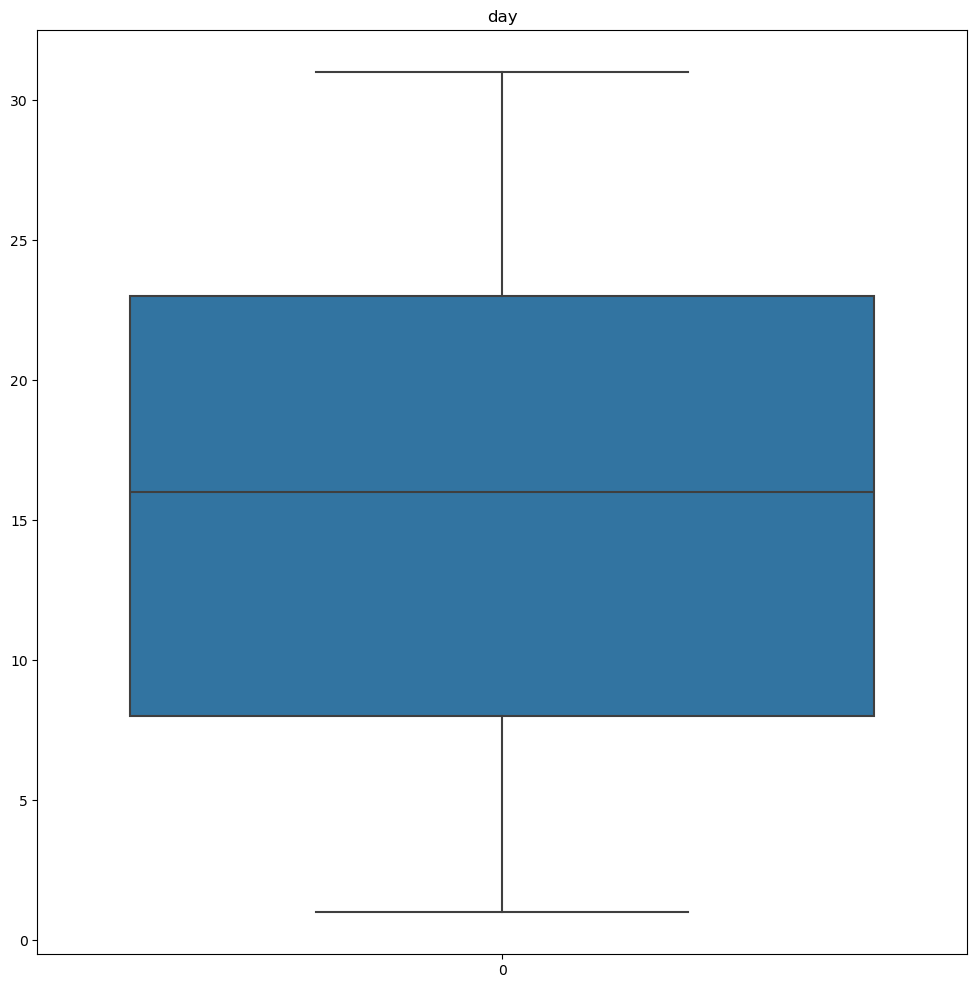

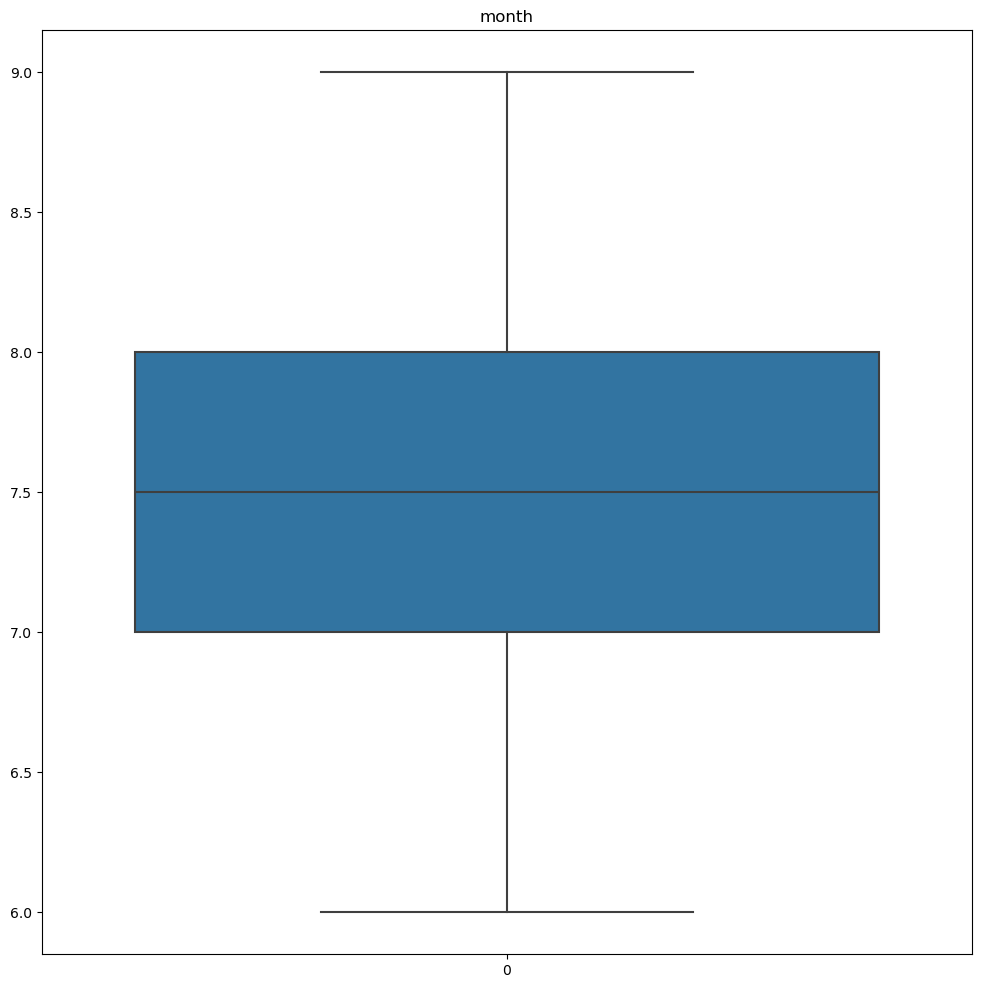

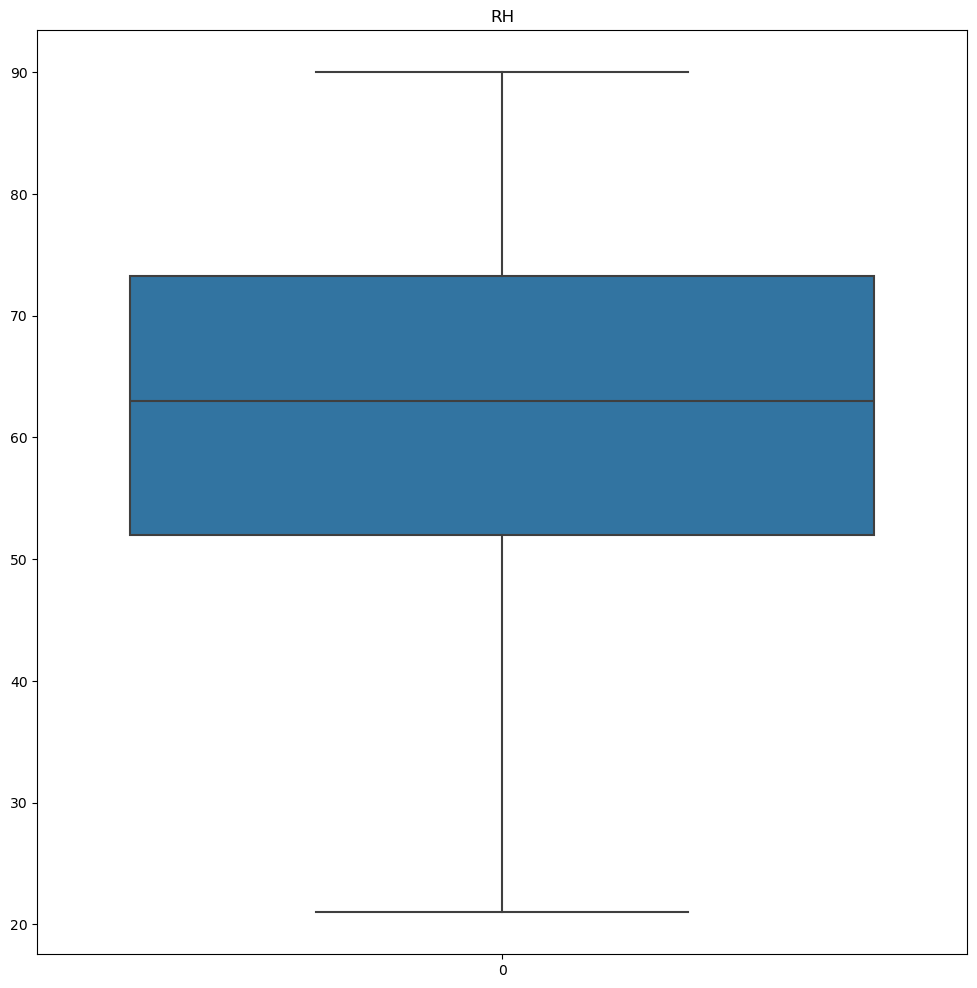

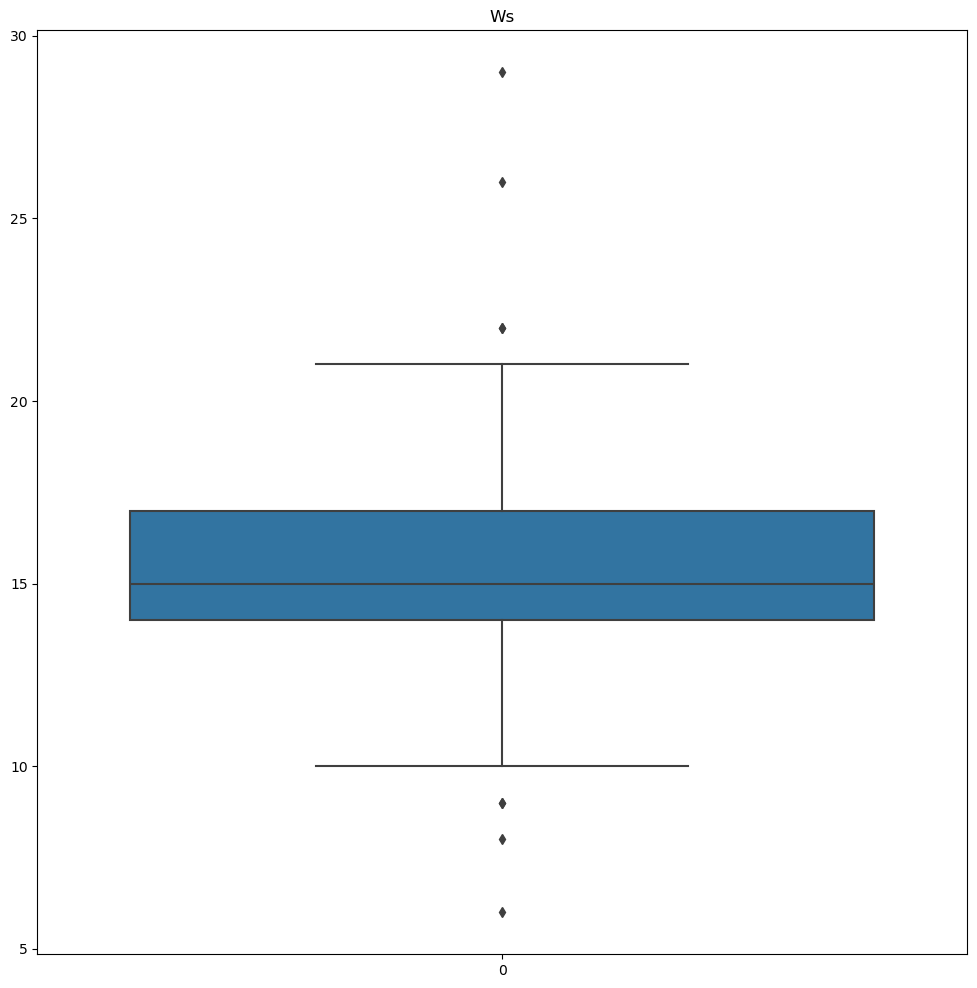

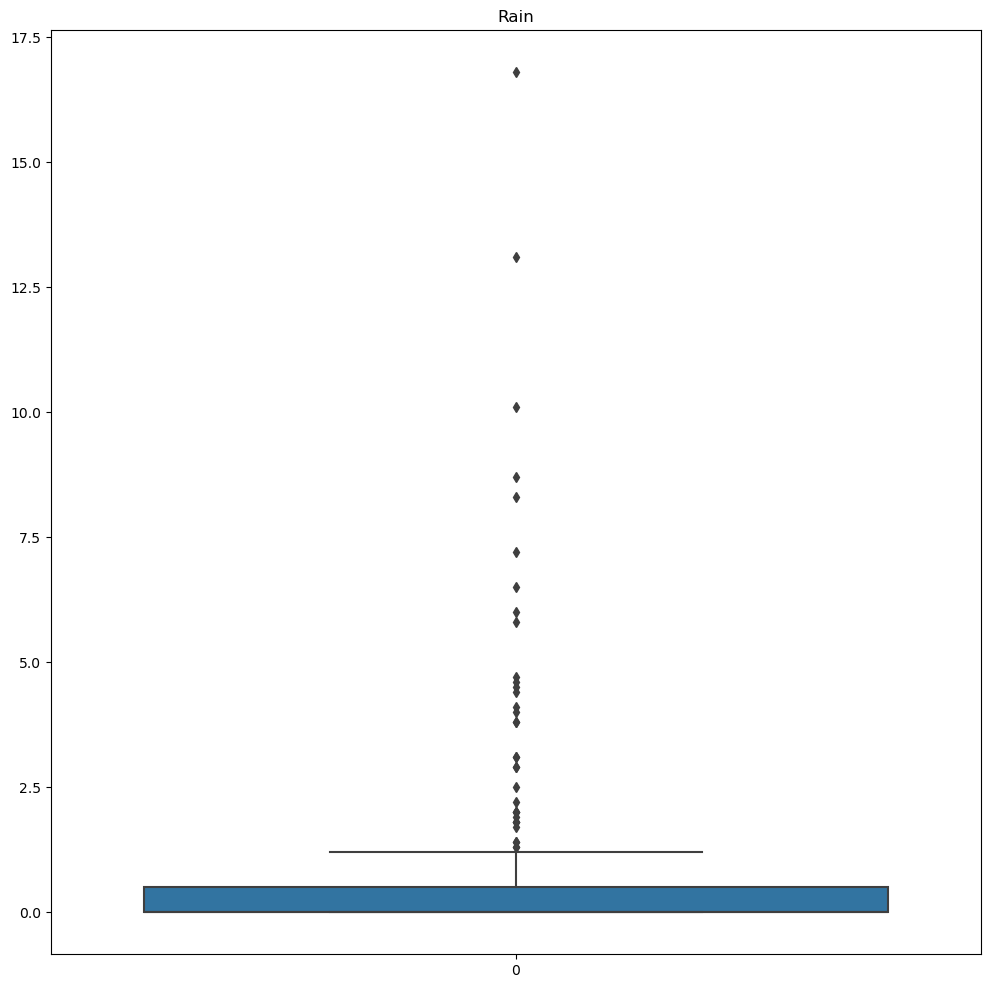

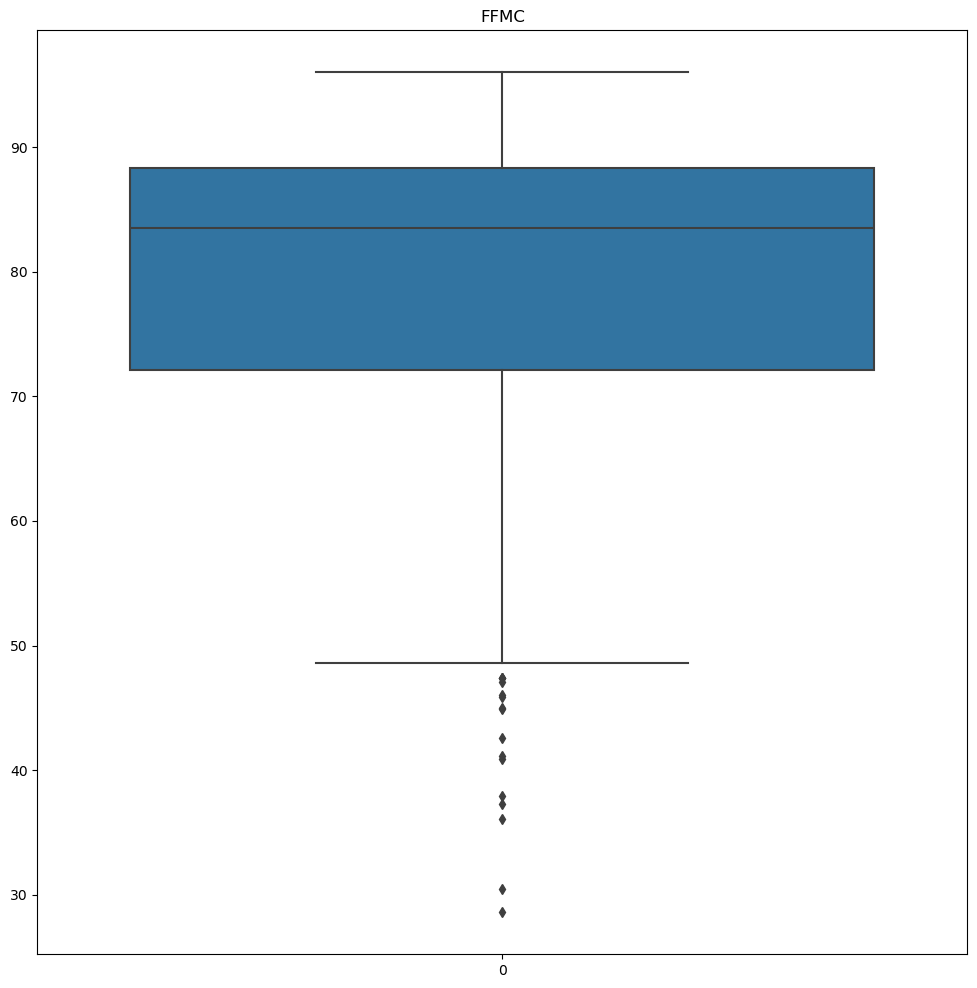

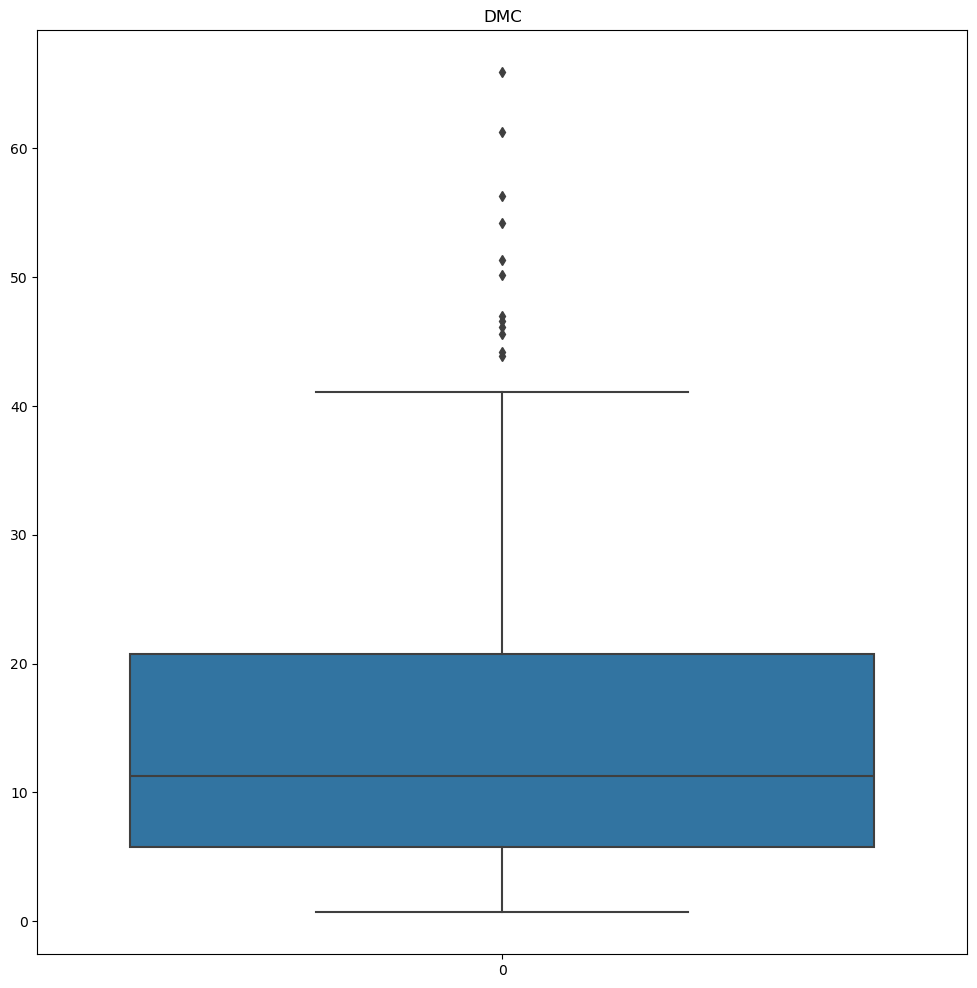

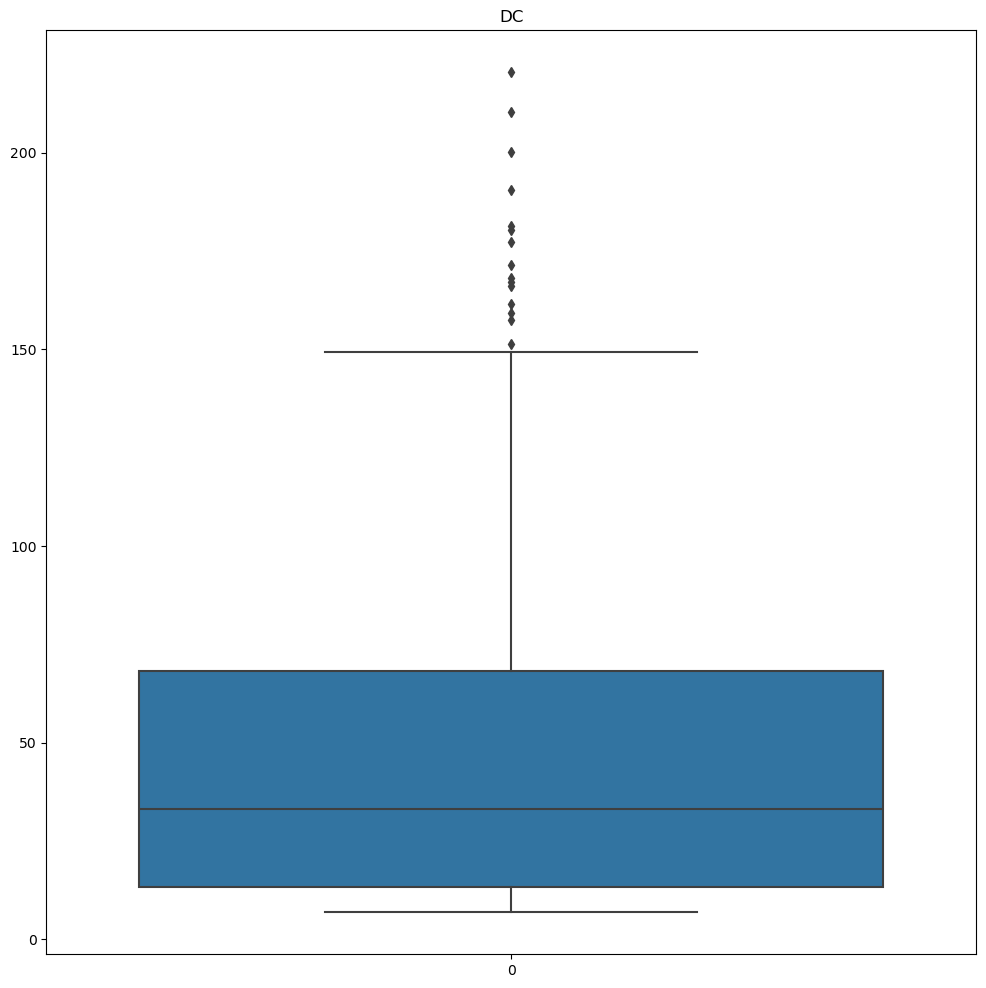

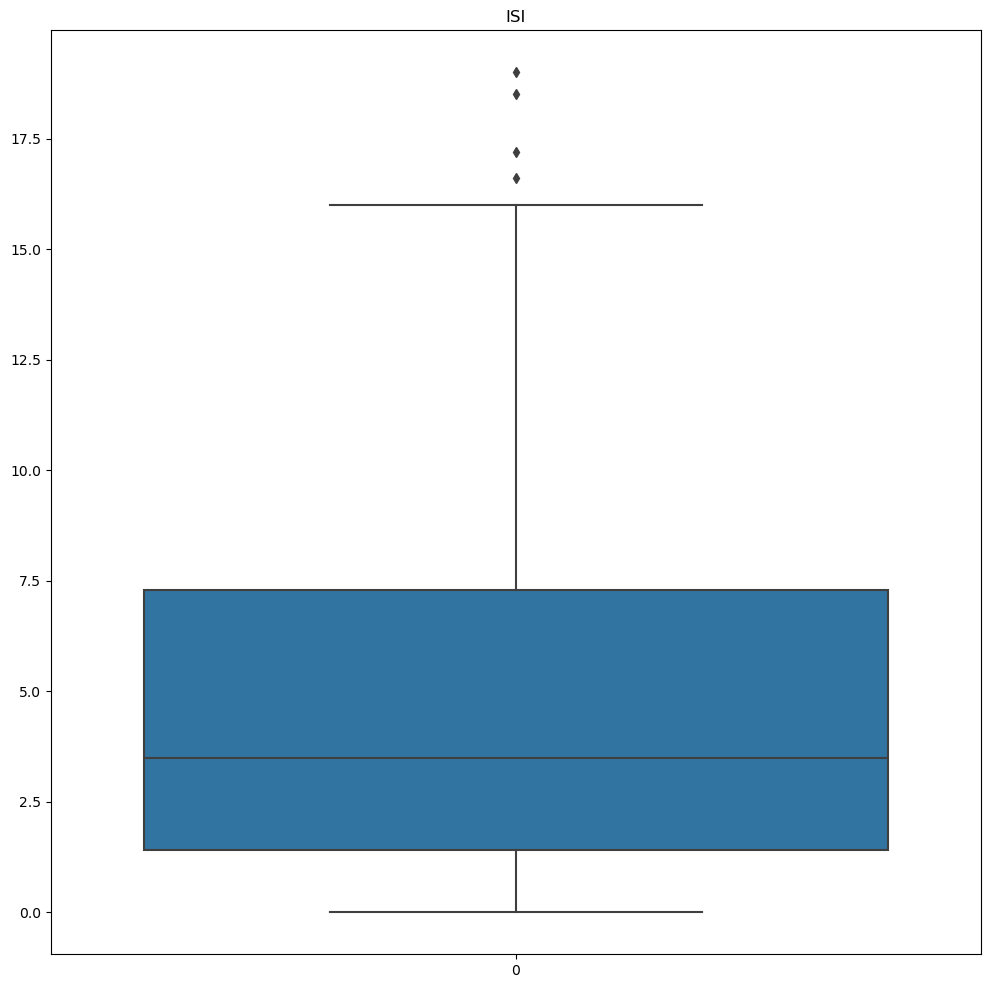

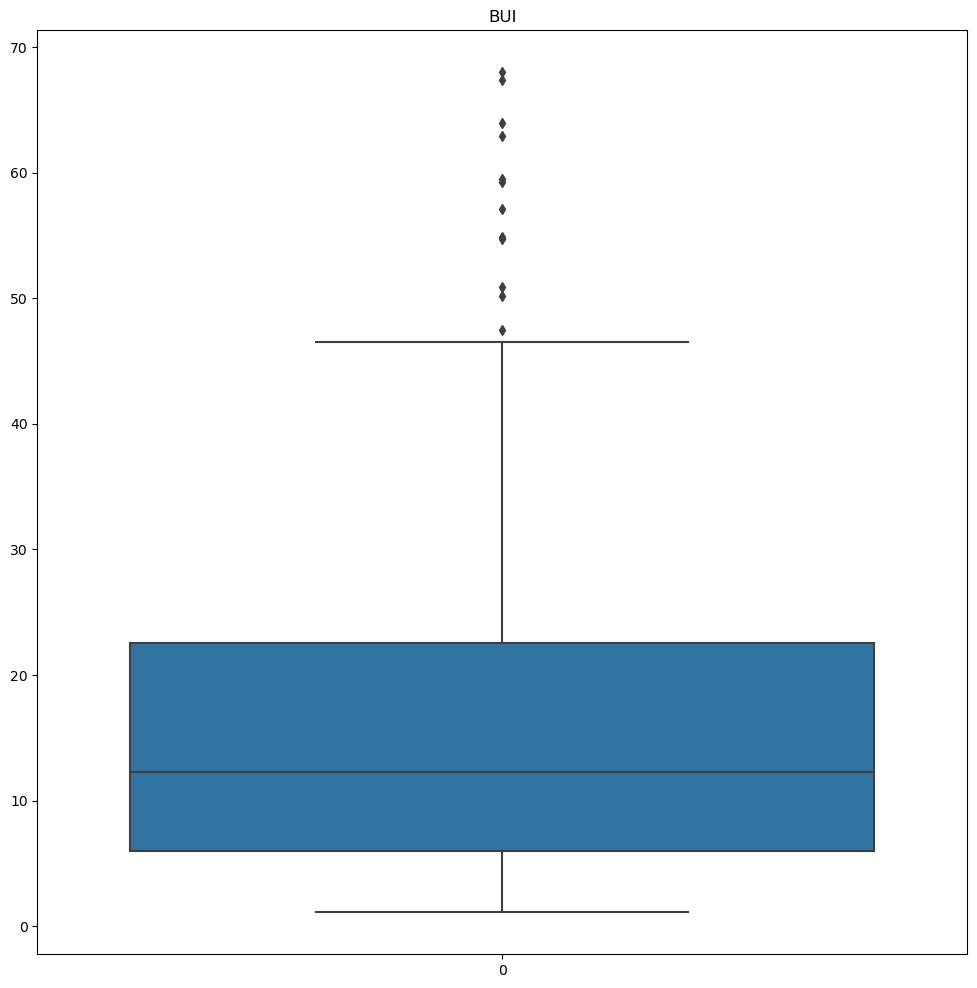

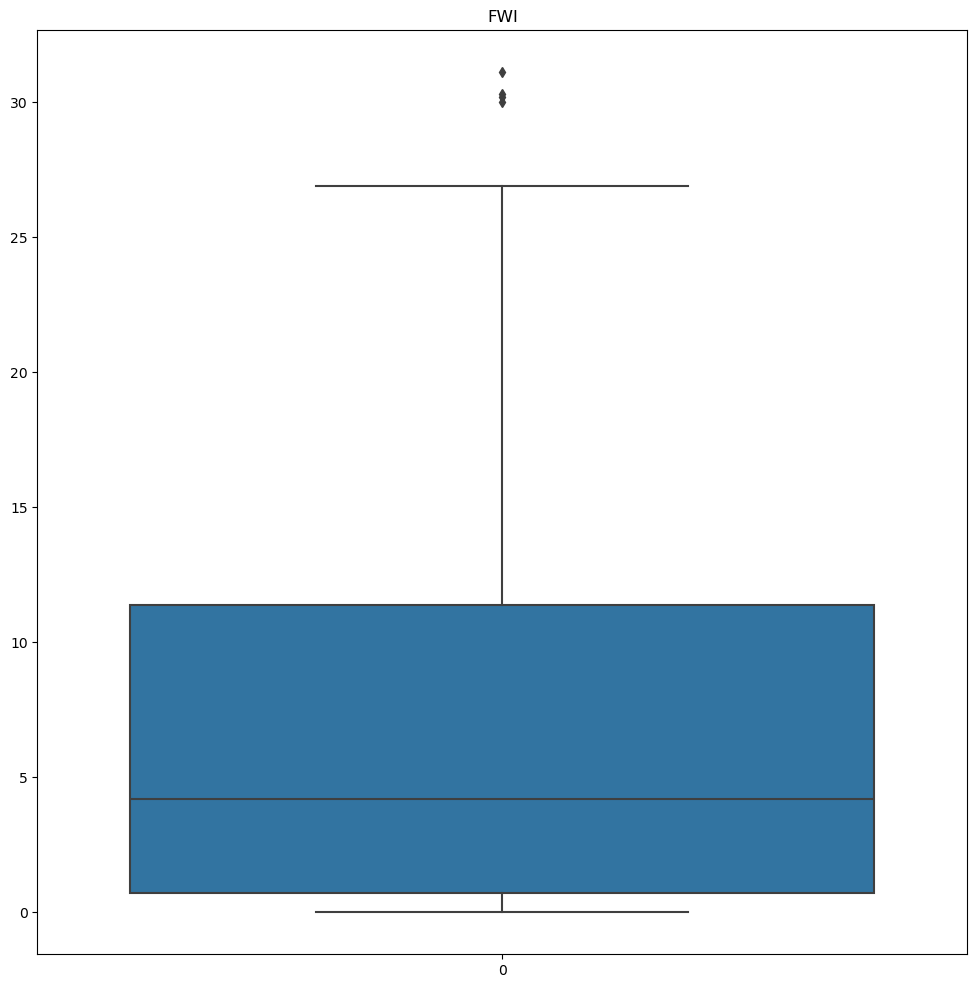

In [34]:
X=df1.drop(columns=['Temperature','Classes'],axis=1)
for col in X.columns:
    plt.figure(figsize=(12,12))
    sns.boxplot(X[col])
    plt.title(col)

observation:Outliers are present in the data

In [37]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))

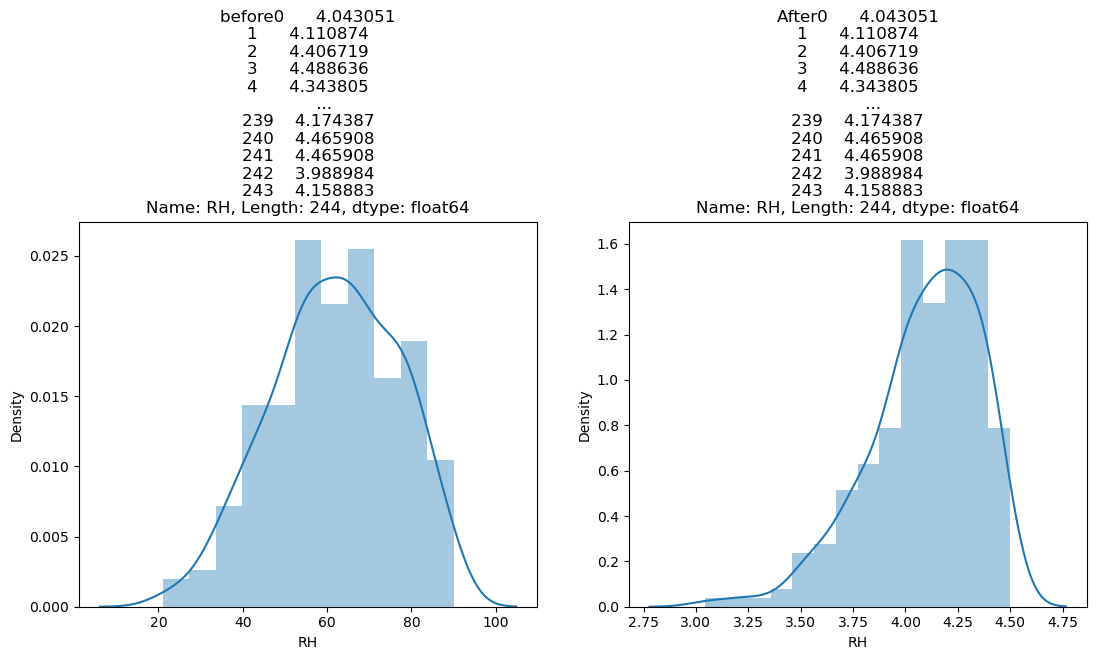

In [42]:
plots(df,'RH',np.log(df['RH']))

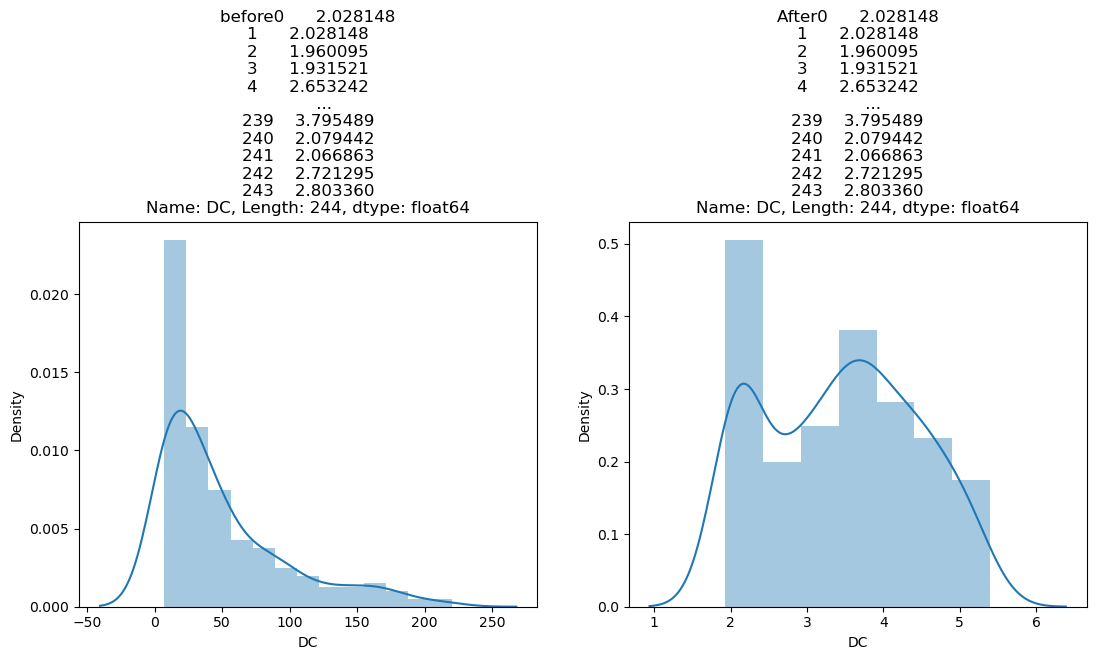

In [43]:
plots(df,'DC',np.log(df['DC']))

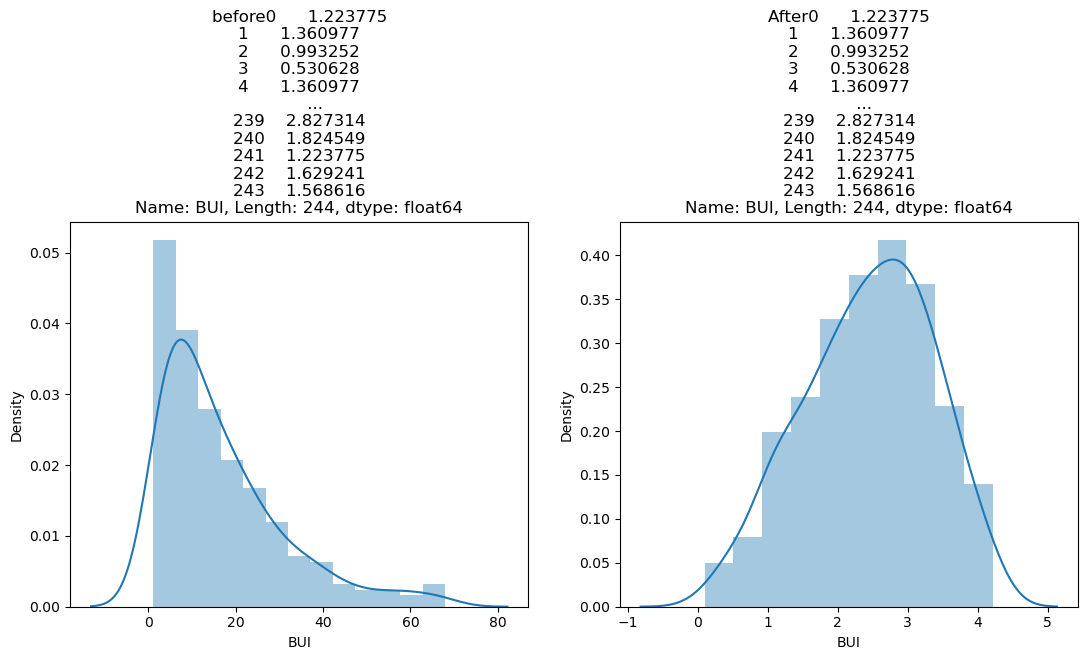

In [44]:
plots(df,'BUI',np.log(df['BUI']))

observation: After applying log transformation some skewness is fixed

NotFittedError: This PowerTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

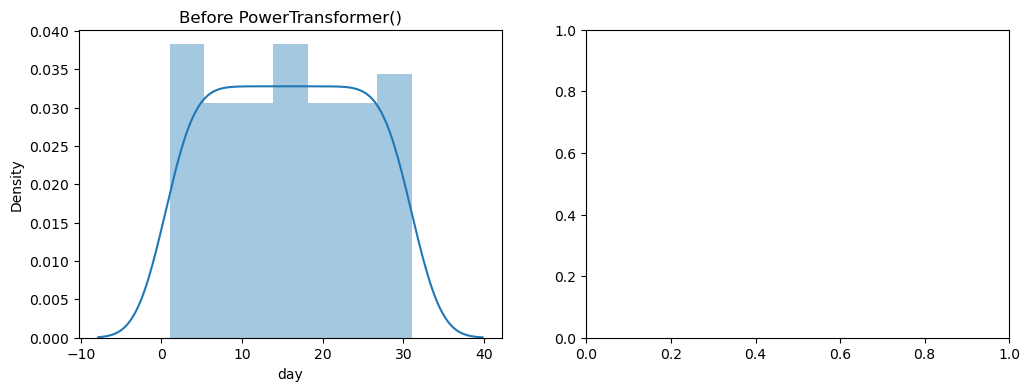

In [50]:
for col in ['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    plots(X,col,PowerTransformer())

In [47]:
from sklearn.preprocessing import PowerTransformer

def powertransformer(data, columns):
    """
    Apply PowerTransformer to specified columns in the DataFrame.

    Args:
    - data: DataFrame, the input DataFrame.
    - columns: list, columns to apply PowerTransformer.

    Returns:
    - transformed_data: DataFrame, the DataFrame with specified columns transformed using PowerTransformer.
    """
    pt = PowerTransformer()
    transformed_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
    
    for col in columns:
        if col in transformed_data.columns:  # Check if the column exists in the DataFrame
            transformed_data[col] = pt.fit_transform(transformed_data[[col]])
        else:
            print(f"Column '{col}' not found in the DataFrame.")

    return transformed_data

In [49]:
def plots(df, var, t):
    """
    Plot the distribution before and after transformation.

    Args:
    - df: DataFrame, the input DataFrame.
    - var: str, the column name to plot.
    - t: transformer object, the transformer used for transformation.

    Returns:
    - None
    """
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('Before ' + str(t))

    plt.subplot(122)
    sns.distplot(t.transform(df[[var]]))
    plt.title('After ' + str(t))

    plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- day
Feature names seen at fit time, yet now missing:
- FWI


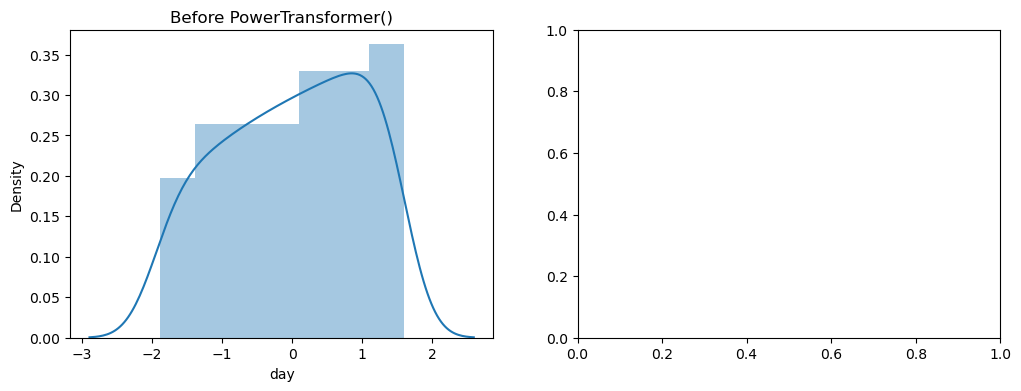

In [51]:
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

def powertransformer(data, columns):
    """
    Apply PowerTransformer to specified columns in the DataFrame.

    Args:
    - data: DataFrame, the input DataFrame.
    - columns: list, columns to apply PowerTransformer.

    Returns:
    - transformed_data: DataFrame, the DataFrame with specified columns transformed using PowerTransformer.
    - pt: PowerTransformer object, fitted to the specified columns.
    """
    pt = PowerTransformer()
    transformed_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
    
    for col in columns:
        if col in transformed_data.columns:  # Check if the column exists in the DataFrame
            transformed_data[col] = pt.fit_transform(transformed_data[[col]])
        else:
            print(f"Column '{col}' not found in the DataFrame.")

    return transformed_data, pt  # Return both the transformed data and the fitted transformer

def plots(df, var, t):
    """
    Plot the distribution before and after transformation.

    Args:
    - df: DataFrame, the input DataFrame.
    - var: str, the column name to plot.
    - t: transformer object, the fitted transformer used for transformation.

    Returns:
    - None
    """
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('Before ' + str(t))

    plt.subplot(122)
    sns.distplot(t.transform(df[[var]]))
    plt.title('After ' + str(t))

    plt.show()

# Example usage
# Assuming X is your DataFrame and 'day' is one of the columns
X_transformed, pt_transformer = powertransformer(X, ['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI'])
plots(X_transformed, 'day', pt_transformer)


# Some key questions answered from the data

In [52]:
# What is highest temperature
df1['Temperature'].max()

42

In [56]:
# What is lowest temperature
df1['Temperature'].min()

22

In [57]:
#When did it rain the most?
df1.sort_values(by='Rain',ascending=False).head(1)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
91,31,8,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,not fire


In [58]:
##When did it rain the least?
df1.sort_values(by='Rain').head(1)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire


In [59]:
# What month is the hottest
df1.sort_values(by='Temperature', ascending=False).head(1)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
199,17,8,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,fire


In [61]:
df1['Classes'].value_counts()/len(df)

Classes
fire        0.565574
not fire    0.434426
Name: count, dtype: float64

In [63]:
df1.groupby(['month','Classes'])['Classes'].count()

month  Classes 
6      fire        25
       not fire    35
7      fire        39
       not fire    23
8      fire        51
       not fire    11
9      fire        23
       not fire    37
Name: Classes, dtype: int64